# PDI – Actividad Práctica

1. Dadas imágenes a niveles de gris, binarizarlas y comparar los resultados:

   * El resultado final tiene 50% de pixels negros y blancos.
   * Encontrar dos modas “clara” y “oscura” y binarizar por distancia mínima.
   * Binarización de Otsu.

2. En imágenes como la (a) encontrar los bordes aplicando Laplaciano, borde morfológico, marching squares.

3. En imágenes como la (b) implementar color fill con la “varita mágica”.

In [1]:
%matplotlib inline

import imageio
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img_a = (imageio.imread('data/img_a.png') / 255)[:,:,0]
img_b = (imageio.imread('data/img_b.png') / 255)[:,:,0]

In [3]:
img_a.shape

(250, 250)

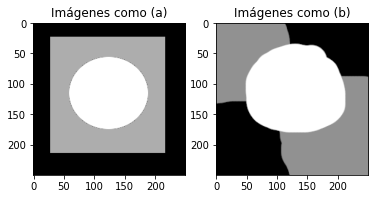

In [4]:
fig, axs = plt.subplots(nrows=1,ncols=2)
axs[0].imshow(img_a, cmap='gray')
axs[0].set_title("Imágenes como (a)")
axs[1].imshow(img_b,cmap='gray')
axs[1].set_title("Imágenes como (b)")

plt.show()

## Binarización

## El resultado final tiene 50% de píxeles negros y blancos

In [5]:
from histogramas import generate_luminance_histogram

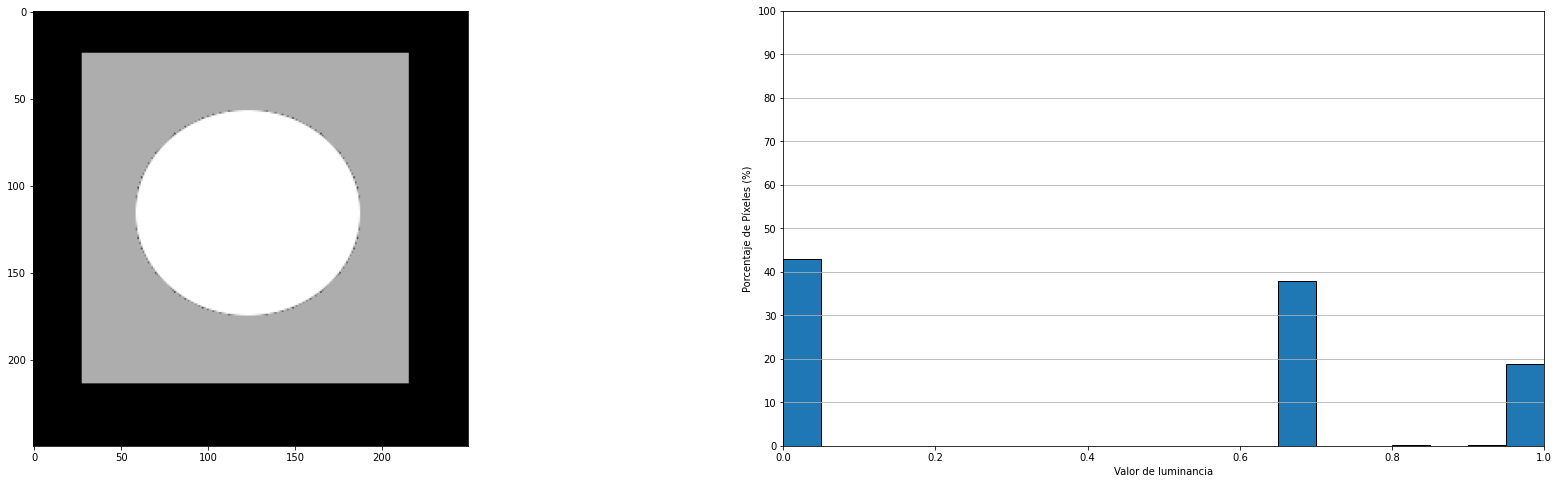

In [6]:
generate_luminance_histogram(img_a, n_intervals=[20])

In [7]:
def binarize(image, threshold=.5):
    copy = np.copy(image)
    
    copy[image >= threshold] = 1
    copy[image < threshold] = 0
    
    return copy

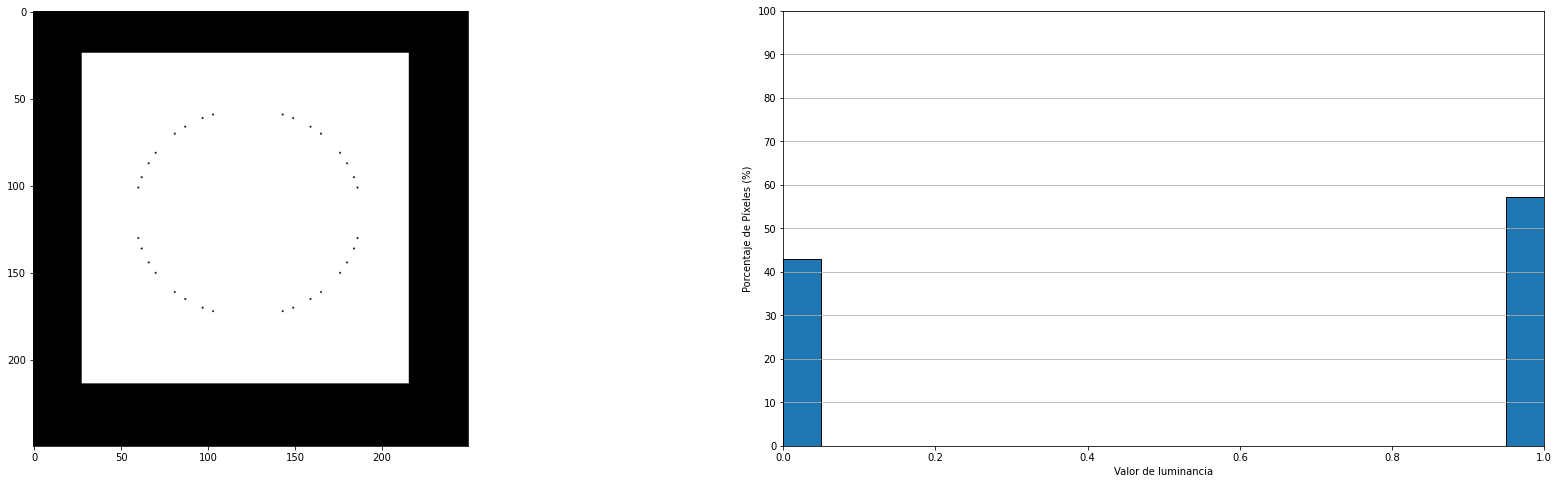

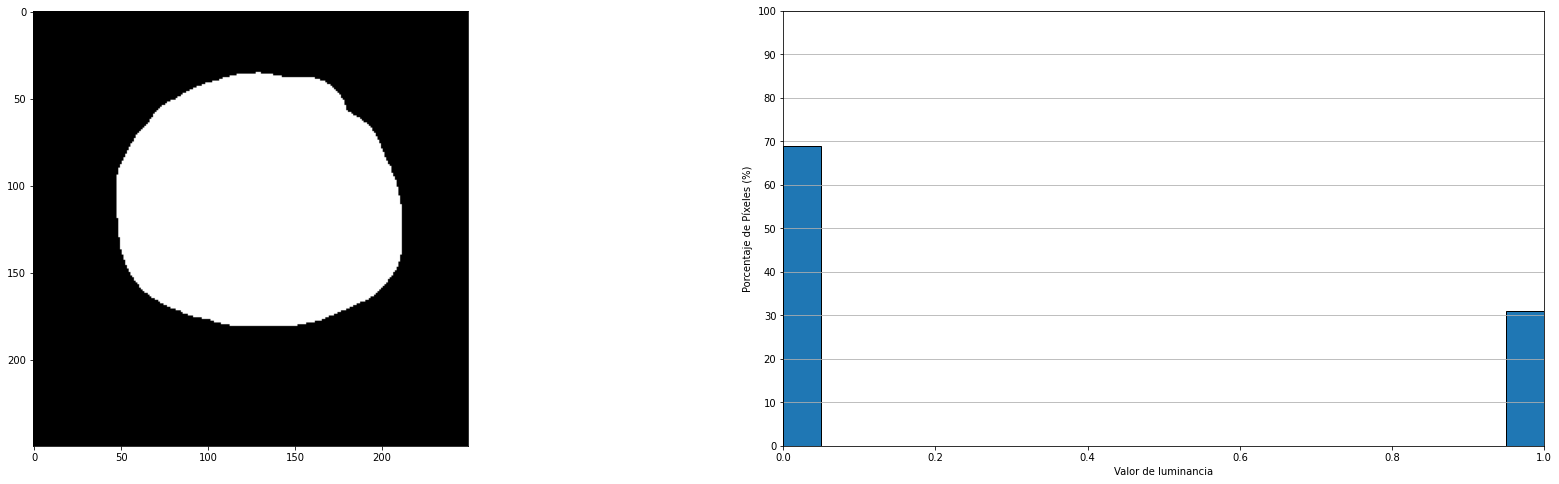

In [8]:
img_a_bin_50_50 = binarize(img_a, threshold=.4)
generate_luminance_histogram(img_a_bin_50_50, n_intervals=[20])
img_b_bin_50_50 = binarize(img_b, threshold=.6)
generate_luminance_histogram(img_b_bin_50_50, n_intervals=[20])

## Encontrar dos modas “clara” y “oscura” y binarizar por distancia mínima.

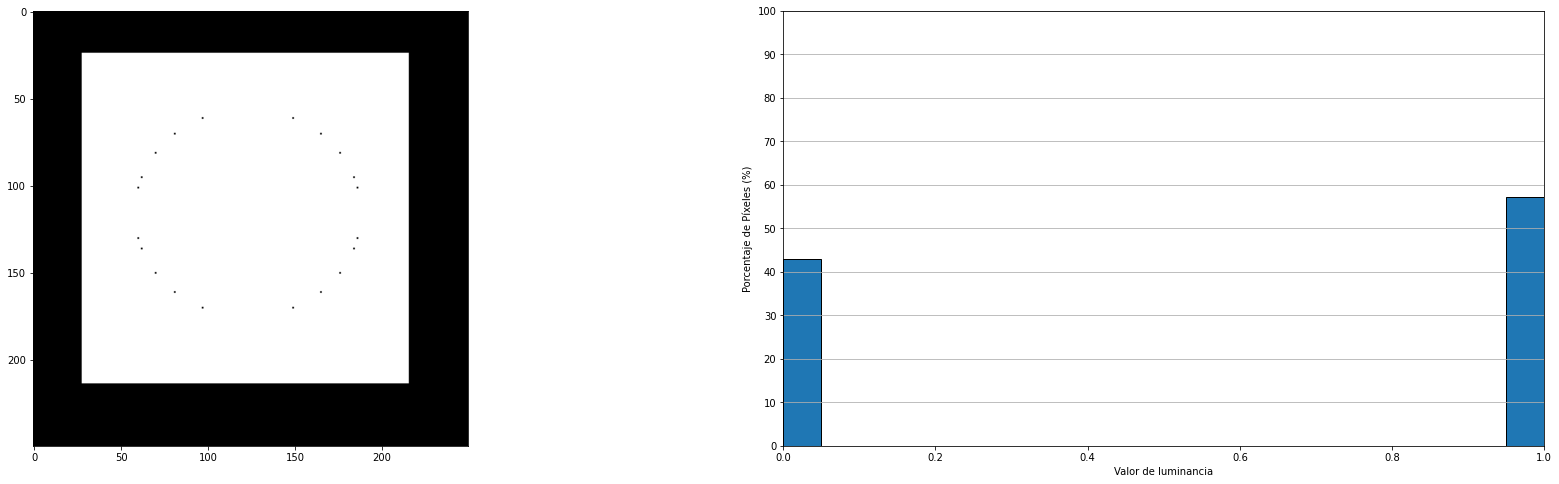

In [9]:
hist, bin_edges = np.histogram(img_a, bins=50)

# Bit rudimentary, but kinda works
(_,dark_mode), (_, bright_mode) = sorted([(n, bin_edge) for n, bin_edge in zip(hist, bin_edges)], key=lambda x: x[0], reverse=True)[:2]

mid_point = abs(dark_mode-bright_mode)/2

img_a_bin_min_distance = binarize(img_a, threshold=mid_point)
generate_luminance_histogram(img_a_bin_min_distance, n_intervals=[20])

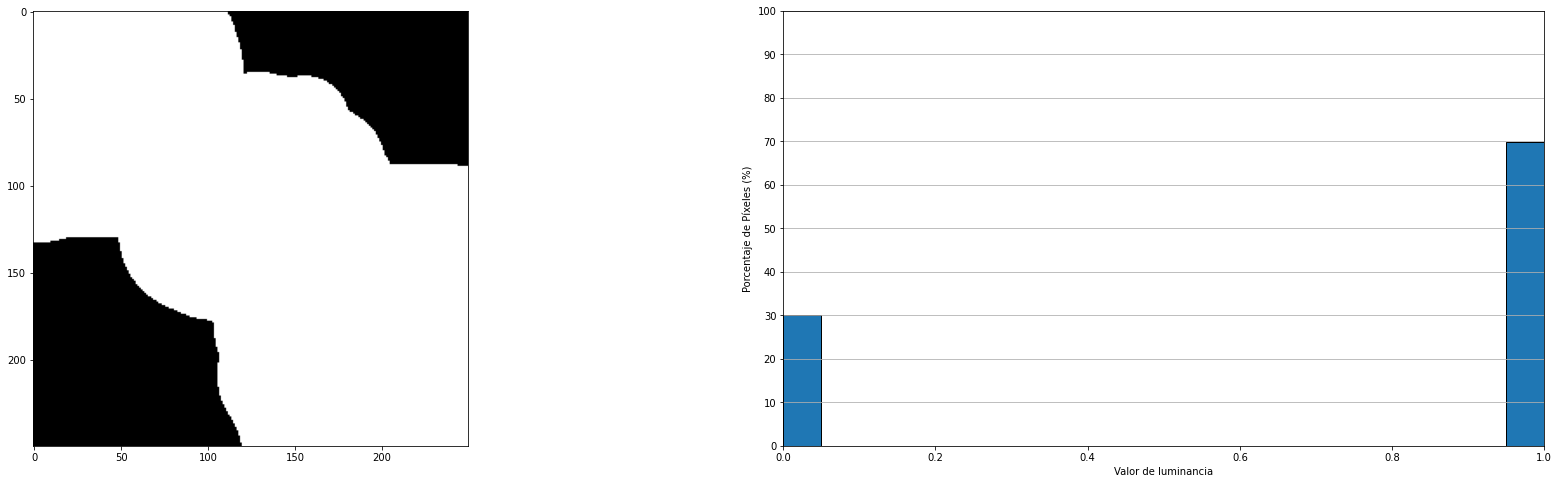

In [10]:
hist, bin_edges = np.histogram(img_b, bins=50)

# Bit rudimentary, but kinda works
(_,dark_mode), (_, bright_mode) = sorted([(n, bin_edge) for n, bin_edge in zip(hist, bin_edges)], key=lambda x: x[0], reverse=True)[:2]

mid_point = abs(dark_mode-bright_mode)/2

img_b_bin_min_distance = binarize(img_b, threshold=mid_point)
generate_luminance_histogram(img_b_bin_min_distance, n_intervals=[20])

## Binarización de Otsu

In [11]:
# Otsu https://en.wikipedia.org/wiki/Otsu%27s_method
def otsu(image, bins=256):
    
    otsus = []
    # minimizar F.var(F) + B.var(B)
    for t in range(bins):
        threshold = t/255
        foreground = image[image >= threshold]
        background = image[image < threshold]
        if len(foreground) == 0 or len(background)==0:
            continue
        varF = np.var(foreground)
        varB = np.var(background)
        value = np.sum(foreground) * varF + np.sum(background) * varB

        otsus.append((threshold,  value))
    
    return min(otsus, key=lambda x: x[1])[0]


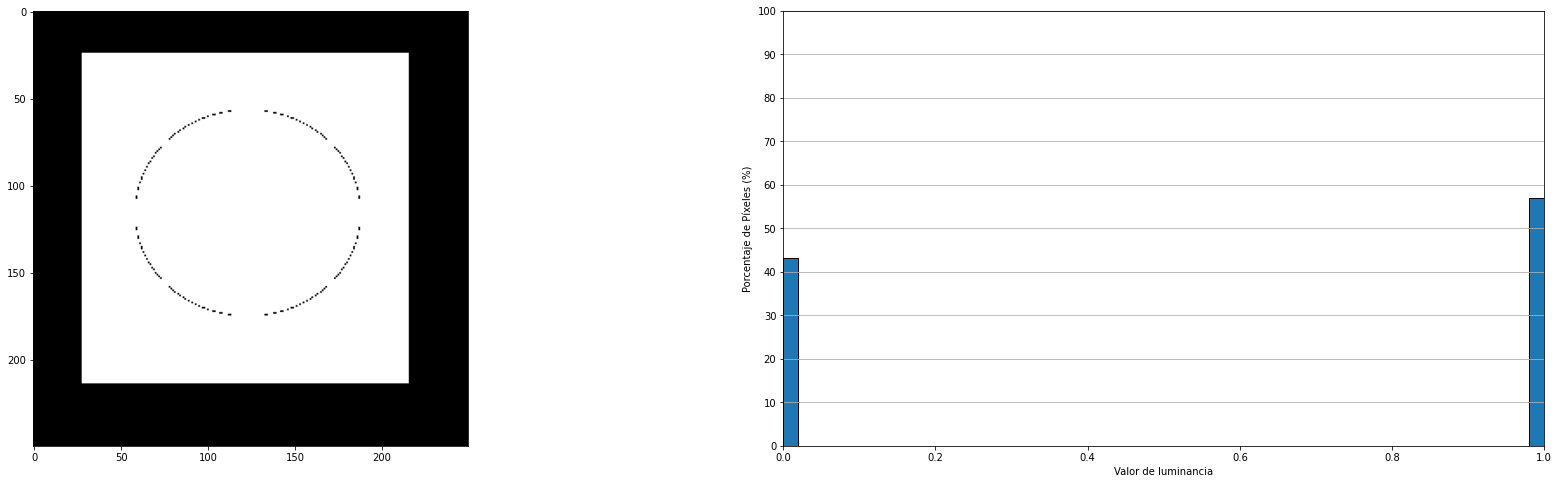

In [12]:
generate_luminance_histogram(
    binarize(
        img_a,
        threshold=otsu(img_a)),
    n_intervals=[50])

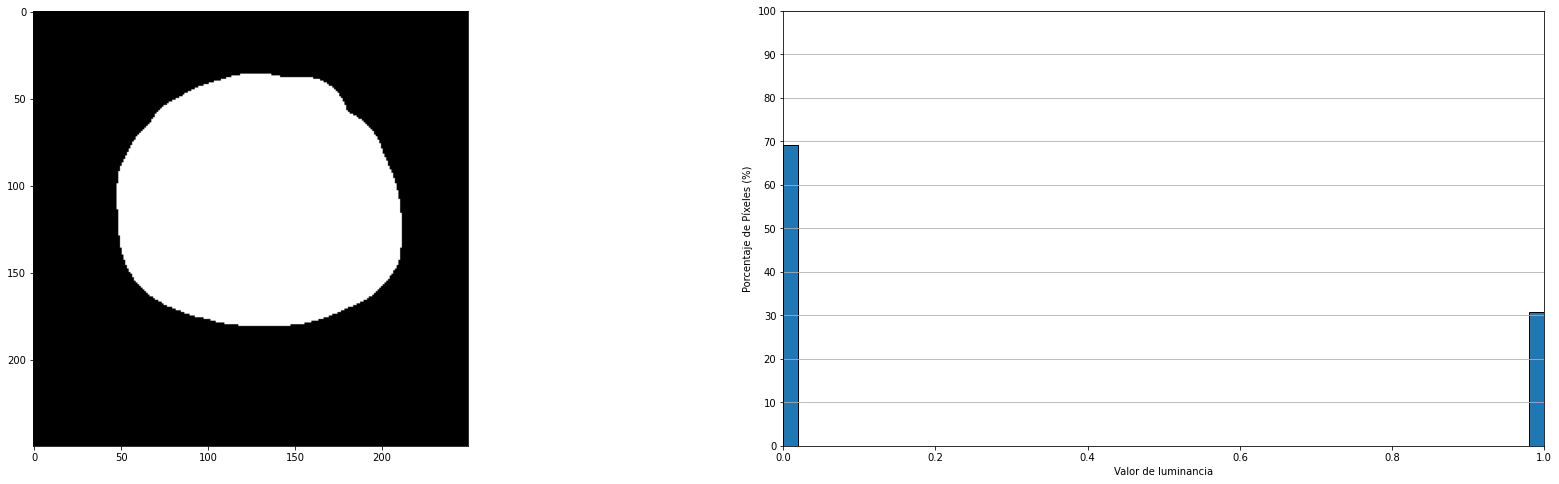

In [13]:
generate_luminance_histogram(
    binarize(
        img_b,
        threshold=otsu(img_b)
    ), n_intervals=[50])

## Segmentación

### Marching Squares

In [14]:
def get_marching_segmentation(case):
    if case == 0:
        return np.array([[0,0,0],
                         [0,0,0],
                         [0,0,0]])
    elif case == 1:
        return np.array([[0,0,0],
                         [1,0,0],
                         [0,1,0]])
    elif case == 2:
        return np.array([[0,0,0],
                         [0,0,1],
                         [0,1,0]])
    elif case == 3:
        return np.array([[0,0,0],
                         [1,1,1],
                         [0,0,0]])
    elif case == 4:
        return np.array([[0,1,0],
                         [0,0,1],
                         [0,0,0]])
    elif case == 5:
        return np.array([[0,1,0],
                         [1,0,1],
                         [0,1,0]])
    elif case == 6:
        return np.array([[0,1,0],
                         [0,1,0],
                         [0,1,0]])
    elif case == 7:
        return np.array([[0,1,0],
                         [1,0,0],
                         [0,0,0]])
    elif case == 8:
        return np.array([[0,1,0],
                         [1,0,0],
                         [0,0,0]])
    elif case == 9:
        return np.array([[0,1,0],
                         [0,1,0],
                         [0,1,0]])
    elif case == 10:
        return np.array([[0,1,0],
                         [1,0,1],
                         [0,1,0]])
    elif case ==11:
        return np.array([[0,1,0],
                         [0,0,1],
                         [0,0,0]])
    elif case ==12:
        return np.array([[0,0,0],
                         [1,1,1],
                         [0,0,0]])
    elif case ==13:
        return np.array([[0,0,0],
                         [0,0,1],
                         [0,1,0]])
    elif case ==14:
        return np.array([[0,0,0],
                         [1,0,0],
                         [0,1,0]])
    elif case ==15:
        return np.array([[0,0,0],
                         [0,0,0],
                         [0,0,0]])


def marching_case(portion):
    [[a,b,d,c]] = portion.reshape((1,4))

    return d + c*2 + b*4 + a*8
    
def marchig_square_cases(img):
    h,w = img.shape
    
    cases = []
    for y in range(h-1):
        row = []
        for x in range(w-1):
            row.append(marching_case(img[y:y+2, x:x+2]))
        cases.append(row)
        
    return np.array(cases).astype(np.uint8) 

def marching_square_contour(cases):
    
    return np.vstack(
        [
            np.hstack([get_marching_segmentation(col) for col in row])
            for row in cases]
    )
            

def marching_squares(img, threshold=.5, order=0):
    binarized_img = binarize(img, threshold)
    
    cases = marchig_square_cases(binarized_img)
    
    return marching_square_contour(cases)

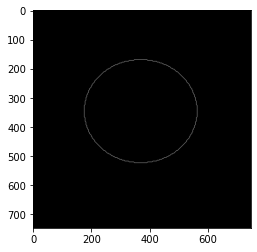

In [15]:
plt.imshow(marching_squares(binarize(img_a, .8)), cmap='gray')

### Laplaciano

In [17]:
from filters import apply_kernel, get_laplace_kernel

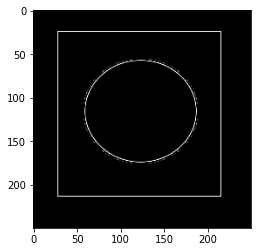

In [18]:
img_a_laplace = apply_kernel(img_a, get_laplace_kernel(8))
plt.imshow(img_a_laplace,cmap='gray')

In [19]:
from borders import border, circle

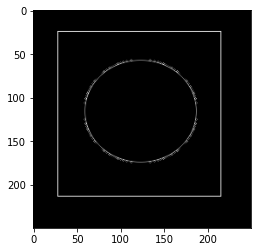

In [20]:
img_a_borders = border(img_a, circle(1))
plt.imshow(img_a_borders,cmap='gray')

## Color fill

0.5686274509803921


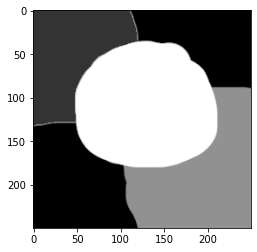

In [21]:
from queue import Queue

def get_neighbors(img_shape, pos):
    y,x = pos
    
    h,w = img_shape
    

    north = (y+1, x  )
    south = (y-1, x  )
    west =  (y  , x-1)
    east =  (y  , x+1)
    
    return sorted(filter(lambda point: 
                       point[0] >= 0 and point[0] < h and
                        point[1] >= 0 and point[1] < w,
                       [north, south, east, west]))
    
    
def color_fill(img, pos, target_color):
    
    img = np.copy(img)
    
    color = img[pos]
    print(color)

    # Seen pixels
    seen = np.zeros(img.shape)

    queue = Queue()
    
    queue.put(pos)
    

    while not queue.empty():
        pos = queue.get_nowait()
        
        img[pos] = target_color
       
        neighbors = get_neighbors(img.shape, pos)

        for n in neighbors:
            if seen[n] == 0 and img[n] == color:
                seen[n] = 1
                queue.put(n)
    
    return img

painted = color_fill(img_b, (0,0),.2)
plt.imshow(painted, cmap='gray')